<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project2 Predictive Modelling:Home Sale Price of Ames, IA

### Part 2 Preprocessing & Feature Engineering

---

## Contents:
- [Data Import and Classification of Variables](#Data-Import-and-Classification-of-Variables)
- [Data Cleaning](#Data-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Preprocessing & Feature Engineering](#Preprocessing-&-Feature-Engineering)
- [Model, Predict & Evaluate](#Model,-Predict-&-Evaluate)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

#### Import Data

In [1]:
#Import libtaries
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%config InlineBackend.figure_format = 'retina'
%matplotlib inline
import sklearn.linear_model as linear_model
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV,Lasso, ElasticNetCV,Ridge,ElasticNet
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.preprocessing import StandardScaler

In [2]:
# Read in data from train Dataframe
train=pd.read_csv('datasets/train_clean.csv')
train.head()

,ms_subclass,ms_zoning,lot_frontage,lot_area,street,lot_shape,land_contour,utilities,lot_config,land_slope,...,enclosed_porch,3ssn_porch,screen_porch,pool_area,misc_val,mo_sold,yr_sold,sale_type,saleprice,total_sf
0,60,RL,0.0,13517,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,...,0,0,0,0,0,3,2010,WD,130500,2204.0
1,60,RL,43.0,11492,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,...,0,0,0,0,0,4,2009,WD,220000,3035.0
2,20,RL,68.0,7922,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,1,2010,WD,109000,2114.0
3,60,RL,73.0,9802,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,4,2010,WD,174000,1828.0
4,50,RL,82.0,14235,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,3,2010,WD,138500,2121.0


In [3]:
# Read in data from test Dataframe
kaggle_test=pd.read_csv('datasets/kaggle_test_clean.csv')
kaggle_test.head()

,ms_subclass,ms_zoning,lot_frontage,lot_area,street,lot_shape,land_contour,utilities,lot_config,land_slope,...,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,misc_val,mo_sold,yr_sold,sale_type,total_sf
0,190,RM,69.0,9142,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,60,112,0,0,0,0,4,2006,WD,2948
1,90,RL,0.0,9662,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,0,8,2006,WD,3934
2,60,RL,58.0,17104,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,24,0,0,0,0,0,9,2006,New,2150
3,30,RM,60.0,8520,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,184,0,0,0,0,7,2007,WD,1936
4,20,RL,0.0,9500,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,76,0,0,185,0,0,7,2009,WD,2788


In [4]:
print(train.shape,kaggle_test.shape)  #Check the both data shapes

(2046, 68) (879, 67)


## Preprocessing & Feature Engineering
#### Converting Ordinal Columns
All the ordinal columns in both training and test dataframe with type object were converted to integer by assigning ranks. This will help in the modeliing and prediction later.

In [5]:
# converting ordinal columns with type object to int by assigning ranks. Using single mapper for all ordinal variables
#with 6 codes
ordinal_mapper6 = {'No': 0, 'Po': 1, 'Fa': 2, 'TA': 3,'Gd': 4,'Ex': 5 }
train['exter_qual'] = train['exter_qual'].map(ordinal_mapper6) #for Train dataframe
train['exter_cond'] = train['exter_cond'].map(ordinal_mapper6)
train['bsmt_qual'] = train['bsmt_qual'].map(ordinal_mapper6)
train['bsmt_cond'] = train['bsmt_cond'].map(ordinal_mapper6)
train['garage_qual'] = train['garage_qual'].map(ordinal_mapper6)
train['garage_cond'] = train['garage_cond'].map(ordinal_mapper6)
train['heating_qc'] = train['heating_qc'].map(ordinal_mapper6)
train['kitchen_qual'] = train['kitchen_qual'].map(ordinal_mapper6)

kaggle_test['exter_qual'] = kaggle_test['exter_qual'].map(ordinal_mapper6) #for Test dataframe
kaggle_test['exter_cond'] = kaggle_test['exter_cond'].map(ordinal_mapper6)
kaggle_test['bsmt_qual'] = kaggle_test['bsmt_qual'].map(ordinal_mapper6)
kaggle_test['bsmt_cond'] = kaggle_test['bsmt_cond'].map(ordinal_mapper6)
kaggle_test['garage_qual'] = kaggle_test['garage_qual'].map(ordinal_mapper6)
kaggle_test['garage_cond'] = kaggle_test['garage_cond'].map(ordinal_mapper6)
kaggle_test['heating_qc'] = kaggle_test['heating_qc'].map(ordinal_mapper6)
kaggle_test['kitchen_qual'] = kaggle_test['kitchen_qual'].map(ordinal_mapper6)

In [6]:
# converting ordinal columns with type object to int by assigning ranks. Using single mapper for all ordinal variables
#with 7 codes
ordinal_mapper8 = {'Sal': 0, 'Sev': 1, 'Maj2': 2, 'Maj1': 3,'Mod': 4,'Min2': 5, 'Min1': 6 ,'Typ': 7 }
train['functional'] = train['functional'].map(ordinal_mapper8) #for Train dataframe

kaggle_test['functional'] = kaggle_test['functional'].map(ordinal_mapper8)#for Test dataframe

In [7]:
# converting ordinal columns with type object to int by assigning ranks. Using single mapper for all ordinal variables
#with 5 codes
ordinal_mapper5={'No':0,'No':1,'Mn':2,'Av':3,'Gd':4}
train['bsmt_exposure'] = train['bsmt_exposure'].map(ordinal_mapper5)#for Train dataframe

kaggle_test['bsmt_exposure'] = kaggle_test['bsmt_exposure'].map(ordinal_mapper5) #for Test dataframe

In [8]:
# converting ordinal columns with type object to int by assigning ranks. Using single mapper for all ordinal variables
#with 7 codes
ordinal_mappers7={'No': 0, 'Detchd': 1, 'CarPort': 2, 'BuiltIn': 3,  
                                                             'Basment': 4,'Attchd': 5,'2Types': 6}
train['garage_type'] = train['garage_type'].map(ordinal_mappers7) #for Train dataframe
kaggle_test['garage_type'] = kaggle_test['garage_type'].map(ordinal_mappers7)#for Test dataframe



In [9]:
# converting ordinal columns with type object to int by assigning ranks.
train['garage_finish'] = train['garage_finish'].map({'No': 0, 'Unf': 1, 'RFn': 2, 'Fin': 3}) #for Train dataframe
kaggle_test['garage_finish'] = kaggle_test['garage_finish'].map({'No': 0, 'Unf': 1, 'RFn': 2, 'Fin': 3}) #for Test dataframe

train['central_air'] = train['central_air'].map({'N': 0,'Y': 1})#for Train dataframe
kaggle_test['central_air'] = kaggle_test['central_air'].map({'N': 0,'Y': 1}) #for Test dataframe

train['paved_drive'] = train['paved_drive'].map({'N': 1,'P': 2,'Y': 3})#for Train dataframe
kaggle_test['paved_drive'] = kaggle_test['paved_drive'].map({'N': 1,'P': 2,'Y': 3})#for Test dataframe


#### Convert Years to Numeric
The following columns have numeric values but are years: <br> -Year Built (Discrete): Original construction date <br> -Year Remod/Add (Discrete): Remodel date (same as construction date if no remodeling or additions) <br> -Garage Yr Blt (Discrete): Year garage was built <br>

Years are converted to a more useful numeric value, age in years at time of sale


In [10]:
#Convert years to numeric
train['built_age'] = train['yr_sold'] - train['year_built']
train['garage_age'] = train['yr_sold'] - train['garage_yr_blt']
train['remod/add_age'] = train['yr_sold'] - train['year_remod/add']
kaggle_test['built_age'] = kaggle_test['yr_sold'] - kaggle_test['year_built']
kaggle_test['garage_age'] = kaggle_test['yr_sold'] - kaggle_test['garage_yr_blt']
kaggle_test['remod/add_age'] = kaggle_test['yr_sold'] - kaggle_test['year_remod/add']

#Drop the year columns
drop_cols=['yr_sold','year_built','garage_yr_blt','year_remod/add']
train = train.drop(drop_cols, axis=1)
kaggle_test = kaggle_test.drop(drop_cols, axis=1)

Age of each house was then plotted againt saleprice. We can see from the below plot that the built age has strong negative correlation aginst saleprice. As the age increases the saleprice also decreases which makes sense. 

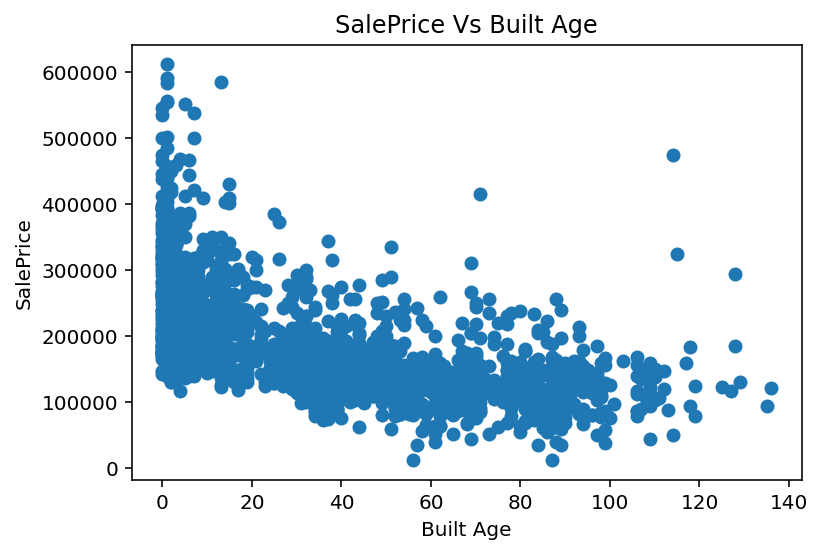

In [11]:
#Plot built age vs saleproce. 
plt.scatter(x=train['built_age'],y=train['saleprice'])
plt.title("SalePrice Vs Built Age")
plt.xlabel("Built Age")
plt.ylabel("SalePrice")
plt.show()

#### Drop columns with low correlation
Columns that are close to 0 correlation were dropped to avoid overfitting of data.

#### Converting Categorical Columns
Only 23 columns listed below were left as categorical columns. The rest were converted to numerical.

In [12]:
#Take a list of left categorical columns. 
cat_var = [col for col in train.columns if train[col].dtypes == 'object'] 
num_var = [col for col in train.columns if train[col].dtypes != 'object'] 
cat_var

['ms_zoning',
 'street',
 'lot_shape',
 'land_contour',
 'utilities',
 'lot_config',
 'land_slope',
 'neighborhood',
 'condition_1',
 'condition_2',
 'bldg_type',
 'house_style',
 'roof_style',
 'roof_matl',
 'exterior_1st',
 'exterior_2nd',
 'mas_vnr_type',
 'foundation',
 'bsmtfin_type_1',
 'bsmtfin_type_2',
 'heating',
 'electrical',
 'sale_type']

Categorical columns were converted to dummies for modelling.

In [13]:
train.shape,kaggle_test.shape #Check number of columns before dummies.

((2046, 67), (879, 66))

In [14]:
#get dummy for train dataframe
train = pd.get_dummies(train, columns=cat_var, 
                       drop_first=True) 
#get dummy for test dataframe
kaggle_test = pd.get_dummies(kaggle_test, columns=cat_var, 
                             drop_first=True) 

In [15]:
train.shape,kaggle_test.shape #Check number of columns after dummies.

((2046, 192), (879, 184))

#### Ensure columns in test is the same as in train

In [16]:
#Selecting columns 
features = [x for x in train.columns if x != 'saleprice']

In [17]:
# Find missing columns in test
missing_cols = set(train.columns) - set(kaggle_test.columns)
# Add a missing column in test with default value equal to 0
for c in missing_cols:
    kaggle_test[c] = 0
# Ensure the order of columns in test is the same as in train
kaggle_test = kaggle_test[features]

In [18]:
train.shape,kaggle_test.shape  #Check number of columns after dummies

((2046, 192), (879, 191))

The difference in the number of columns between train and test dataframe is saleprice column.

#### Normalize Target column
It is evident that Sale Price do not follow a normal distribution. It is right skewed.For the regressors to work better, the data shouldn't be sparsely distributed. Taking the log function to normalize in this instance.

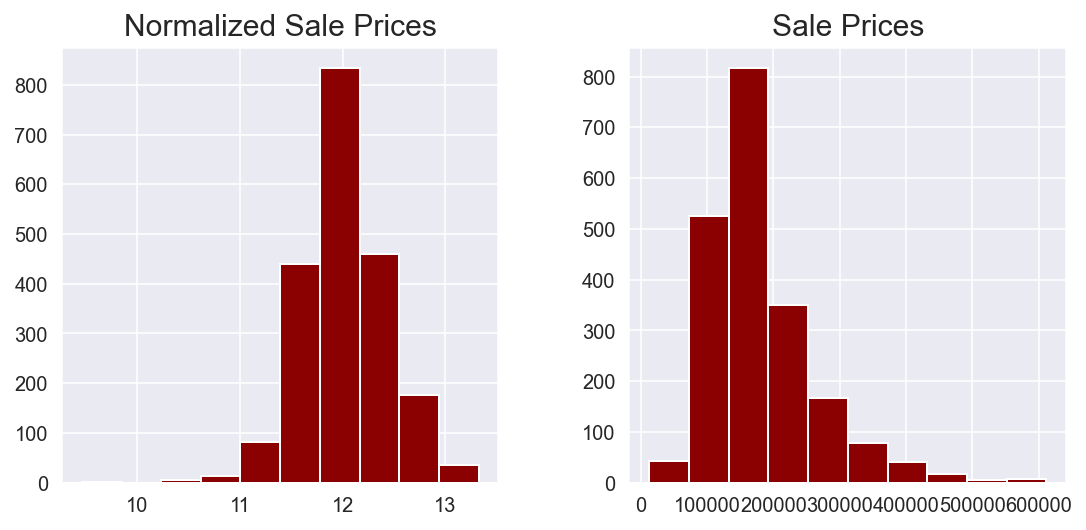

In [19]:
#Normalize target column
sns.set_style('darkgrid')
norm_saleprice = np.log(train['saleprice'])
pre_n_post_sale_price = pd.DataFrame({'Normalized Sale Prices':norm_saleprice, 
                                      'Sale Prices': train["saleprice"]})
fig = pre_n_post_sale_price.hist(figsize = [9,4],color = 'darkred');

## adjusting the size of title
[x.title.set_size(15) for x in fig.ravel()]  
train.saleprice = norm_saleprice

#### Saving the Dataframe

In [20]:
train.to_csv('datasets/train_featured.csv', index=False)

In [21]:
kaggle_test.to_csv('datasets/kaggle_test_featured.csv', index=False)
print(train.shape,kaggle_test.shape)

(2046, 192) (879, 191)
